In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/gender_classification_v7.csv')

In [3]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
df.isna().sum()

,0
long_hair,0
forehead_width_cm,0
forehead_height_cm,0
nose_wide,0
nose_long,0
lips_thin,0
distance_nose_to_lip_long,0
gender,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [8]:
X = df.drop(columns='gender')
y = df["gender"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((4000, 7), (1001, 7)), ((4000,), (1001,)))

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [13]:
y_pred = model.predict(X_test_scaled)

In [14]:
accuracy_score(y_test, y_pred)

0.961038961038961

In [15]:
accuracy_score(y_train, model.predict(X_train_scaled))

0.97

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=21)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=21)

In [18]:
y_pred_knn = knn_model.predict(X_test_scaled)


In [19]:
accuracy_score(y_test, y_pred_knn)

0.964035964035964

In [20]:
accuracy_score(y_train, knn_model.predict(X_train_scaled))

0.97175

In [21]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [22]:
svm_model = SVC(C=0.1)
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)

In [23]:
svm_accuracy

0.967032967032967

In [24]:
accuracy_score(y_train, svm_model.predict(X_train_scaled))

0.9755

In [25]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_predictions = nb_model.predict(X_test_scaled)
nb_accuracy = accuracy_score(y_test, nb_predictions)

In [26]:
nb_accuracy

0.964035964035964

In [27]:
accuracy_score(y_train, svm_model.predict(X_train_scaled))

0.9755

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


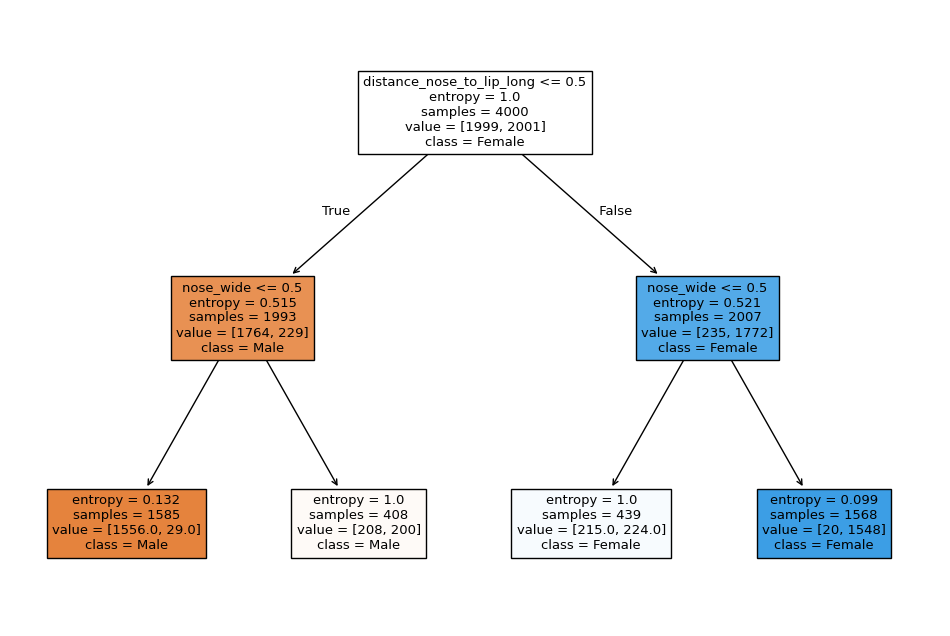

In [32]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Male", "Female"])
plt.show()

In [33]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [34]:
y_pred = clf.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred)

0.962037962037962

In [36]:
accuracy_score(y_train, clf.predict(X_train_scaled))

0.96125

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=10, criterion="entropy", max_depth=4, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=10,
                       random_state=42)

In [42]:
y_pred = rf_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.964035964035964

In [43]:
accuracy_score(y_train, rf_clf.predict(X_train_scaled))

0.9575

In [45]:
!pip install ace_tools

In [48]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=4, random_state=42),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42),
    "SVM": SVC(kernel='linear'),
    "Naive Bayes": GaussianNB()
}

results = []
for name, model in models.items():
    if name in ["Logistic Regression", "KNN", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    results.append([name, train_acc, test_acc])

results_df = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy"])

results_df.sort_values(by="Test Accuracy", ascending=False)


,Model,Train Accuracy,Test Accuracy
5,Naive Bayes,0.97175,0.964036
2,Random Forest,0.97700,0.963037
3,Decision Tree,0.96425,0.962038
0,Logistic Regression,0.97000,0.961039
4,SVM,0.96925,0.960040
1,KNN,0.97650,0.959041
